In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
   
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [5]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)


KeysView(<numpy.lib.npyio.NpzFile object at 0x7fc2cb6651c0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fc2cb6650d0>)


Epoch 1: 1.8s to complete
    error(train)=1.20e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.52e-01


Epoch 2: 2.0s to complete
    error(train)=1.02e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


Epoch 3: 1.8s to complete
    error(train)=9.19e-01, acc(train)=7.28e-01, error(valid)=9.43e-01, acc(valid)=7.24e-01


Epoch 4: 1.9s to complete
    error(train)=8.51e-01, acc(train)=7.47e-01, error(valid)=8.80e-01, acc(valid)=7.40e-01


Epoch 5: 2.0s to complete
    error(train)=8.19e-01, acc(train)=7.53e-01, error(valid)=8.48e-01, acc(valid)=7.44e-01


Epoch 6: 1.9s to complete
    error(train)=7.78e-01, acc(train)=7.64e-01, error(valid)=8.12e-01, acc(valid)=7.56e-01


Epoch 7: 2.7s to complete
    error(train)=7.65e-01, acc(train)=7.66e-01, error(valid)=8.06e-01, acc(valid)=7.55e-01


Epoch 8: 1.9s to complete
    error(train)=7.25e-01, acc(train)=7.76e-01, error(valid)=7.63e-01, acc(valid)=7.66e-01


Epoch 9: 1.8s to complete
    error(train)=7.09e-01, acc(train)=7.81e-01, error(valid)=7.58e-01, acc(valid)=7.70e-01


Epoch 10: 1.7s to complete
    error(train)=6.95e-01, acc(train)=7.85e-01, error(valid)=7.45e-01, acc(valid)=7.73e-01


Epoch 11: 1.8s to complete
    error(train)=6.90e-01, acc(train)=7.86e-01, error(valid)=7.44e-01, acc(valid)=7.72e-01


Epoch 12: 1.6s to complete
    error(train)=6.65e-01, acc(train)=7.92e-01, error(valid)=7.19e-01, acc(valid)=7.79e-01


Epoch 13: 1.8s to complete
    error(train)=6.68e-01, acc(train)=7.90e-01, error(valid)=7.28e-01, acc(valid)=7.72e-01


Epoch 14: 2.0s to complete
    error(train)=6.47e-01, acc(train)=7.98e-01, error(valid)=7.12e-01, acc(valid)=7.81e-01


Epoch 15: 1.8s to complete
    error(train)=6.47e-01, acc(train)=7.95e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


Epoch 16: 1.9s to complete
    error(train)=6.33e-01, acc(train)=8.00e-01, error(valid)=7.04e-01, acc(valid)=7.83e-01


Epoch 17: 1.9s to complete
    error(train)=6.28e-01, acc(train)=8.02e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


Epoch 18: 2.0s to complete
    error(train)=6.24e-01, acc(train)=8.03e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


Epoch 19: 2.0s to complete
    error(train)=6.18e-01, acc(train)=8.03e-01, error(valid)=6.92e-01, acc(valid)=7.84e-01


Epoch 20: 1.9s to complete
    error(train)=6.02e-01, acc(train)=8.09e-01, error(valid)=6.80e-01, acc(valid)=7.90e-01


Epoch 21: 1.9s to complete
    error(train)=6.04e-01, acc(train)=8.09e-01, error(valid)=6.79e-01, acc(valid)=7.90e-01


Epoch 22: 1.9s to complete
    error(train)=5.97e-01, acc(train)=8.10e-01, error(valid)=6.82e-01, acc(valid)=7.85e-01


Epoch 23: 1.8s to complete
    error(train)=5.91e-01, acc(train)=8.10e-01, error(valid)=6.76e-01, acc(valid)=7.87e-01


Epoch 24: 1.7s to complete
    error(train)=6.12e-01, acc(train)=8.04e-01, error(valid)=6.98e-01, acc(valid)=7.82e-01


Epoch 25: 1.9s to complete
    error(train)=5.84e-01, acc(train)=8.15e-01, error(valid)=6.73e-01, acc(valid)=7.93e-01


Epoch 26: 2.0s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.69e-01, acc(valid)=7.92e-01


Epoch 27: 1.8s to complete
    error(train)=5.78e-01, acc(train)=8.15e-01, error(valid)=6.65e-01, acc(valid)=7.89e-01


Epoch 28: 2.0s to complete
    error(train)=5.74e-01, acc(train)=8.15e-01, error(valid)=6.63e-01, acc(valid)=7.91e-01


Epoch 29: 2.0s to complete
    error(train)=5.76e-01, acc(train)=8.14e-01, error(valid)=6.68e-01, acc(valid)=7.88e-01


Epoch 30: 2.0s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=6.74e-01, acc(valid)=7.89e-01


Epoch 31: 2.1s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=6.71e-01, acc(valid)=7.92e-01


Epoch 32: 2.0s to complete
    error(train)=5.60e-01, acc(train)=8.20e-01, error(valid)=6.59e-01, acc(valid)=7.94e-01


Epoch 33: 1.9s to complete
    error(train)=5.63e-01, acc(train)=8.18e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01


Epoch 34: 1.9s to complete
    error(train)=5.59e-01, acc(train)=8.20e-01, error(valid)=6.61e-01, acc(valid)=7.93e-01


Epoch 35: 2.0s to complete
    error(train)=5.66e-01, acc(train)=8.13e-01, error(valid)=6.71e-01, acc(valid)=7.90e-01


Epoch 36: 1.9s to complete
    error(train)=5.59e-01, acc(train)=8.18e-01, error(valid)=6.66e-01, acc(valid)=7.93e-01


Epoch 37: 1.8s to complete
    error(train)=5.49e-01, acc(train)=8.21e-01, error(valid)=6.56e-01, acc(valid)=7.92e-01


Epoch 38: 2.0s to complete
    error(train)=5.35e-01, acc(train)=8.27e-01, error(valid)=6.40e-01, acc(valid)=8.00e-01


Epoch 39: 1.9s to complete
    error(train)=5.59e-01, acc(train)=8.19e-01, error(valid)=6.74e-01, acc(valid)=7.91e-01


Epoch 40: 2.2s to complete
    error(train)=5.44e-01, acc(train)=8.24e-01, error(valid)=6.54e-01, acc(valid)=7.96e-01


Epoch 41: 1.9s to complete
    error(train)=5.35e-01, acc(train)=8.26e-01, error(valid)=6.49e-01, acc(valid)=7.95e-01


Epoch 42: 1.8s to complete
    error(train)=5.41e-01, acc(train)=8.25e-01, error(valid)=6.60e-01, acc(valid)=7.94e-01


Epoch 43: 1.8s to complete
    error(train)=5.48e-01, acc(train)=8.19e-01, error(valid)=6.63e-01, acc(valid)=7.91e-01


Epoch 44: 1.6s to complete
    error(train)=5.42e-01, acc(train)=8.22e-01, error(valid)=6.56e-01, acc(valid)=7.95e-01


Epoch 45: 1.6s to complete
    error(train)=5.37e-01, acc(train)=8.24e-01, error(valid)=6.54e-01, acc(valid)=7.98e-01


Epoch 46: 1.6s to complete
    error(train)=5.26e-01, acc(train)=8.28e-01, error(valid)=6.43e-01, acc(valid)=7.99e-01


Epoch 47: 1.7s to complete
    error(train)=5.22e-01, acc(train)=8.30e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 48: 1.7s to complete
    error(train)=5.24e-01, acc(train)=8.28e-01, error(valid)=6.42e-01, acc(valid)=8.01e-01


Epoch 49: 1.8s to complete
    error(train)=5.21e-01, acc(train)=8.30e-01, error(valid)=6.42e-01, acc(valid)=8.01e-01


Epoch 50: 2.0s to complete
    error(train)=5.21e-01, acc(train)=8.29e-01, error(valid)=6.48e-01, acc(valid)=7.98e-01


Epoch 51: 1.9s to complete
    error(train)=5.23e-01, acc(train)=8.28e-01, error(valid)=6.47e-01, acc(valid)=7.96e-01


Epoch 52: 2.0s to complete
    error(train)=5.23e-01, acc(train)=8.28e-01, error(valid)=6.48e-01, acc(valid)=7.99e-01


Epoch 53: 2.0s to complete
    error(train)=5.18e-01, acc(train)=8.28e-01, error(valid)=6.47e-01, acc(valid)=7.95e-01


Epoch 54: 1.8s to complete
    error(train)=5.28e-01, acc(train)=8.28e-01, error(valid)=6.55e-01, acc(valid)=7.97e-01


Epoch 55: 1.9s to complete
    error(train)=5.17e-01, acc(train)=8.29e-01, error(valid)=6.46e-01, acc(valid)=7.97e-01


Epoch 56: 1.9s to complete
    error(train)=5.27e-01, acc(train)=8.26e-01, error(valid)=6.59e-01, acc(valid)=7.92e-01


Epoch 57: 1.7s to complete
    error(train)=5.14e-01, acc(train)=8.28e-01, error(valid)=6.44e-01, acc(valid)=7.96e-01


Epoch 58: 1.8s to complete
    error(train)=5.10e-01, acc(train)=8.33e-01, error(valid)=6.40e-01, acc(valid)=8.00e-01


Epoch 59: 1.8s to complete
    error(train)=5.21e-01, acc(train)=8.28e-01, error(valid)=6.58e-01, acc(valid)=7.95e-01


Epoch 60: 1.7s to complete
    error(train)=5.26e-01, acc(train)=8.25e-01, error(valid)=6.61e-01, acc(valid)=7.92e-01


Epoch 61: 1.8s to complete
    error(train)=5.02e-01, acc(train)=8.35e-01, error(valid)=6.38e-01, acc(valid)=8.00e-01


Epoch 62: 1.9s to complete
    error(train)=5.03e-01, acc(train)=8.34e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


Epoch 63: 2.0s to complete
    error(train)=5.04e-01, acc(train)=8.33e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 64: 1.8s to complete
    error(train)=5.09e-01, acc(train)=8.32e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


Epoch 65: 1.9s to complete
    error(train)=5.00e-01, acc(train)=8.36e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


Epoch 66: 1.8s to complete
    error(train)=5.02e-01, acc(train)=8.35e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


Epoch 67: 1.9s to complete
    error(train)=4.99e-01, acc(train)=8.34e-01, error(valid)=6.44e-01, acc(valid)=7.97e-01


Epoch 68: 1.7s to complete
    error(train)=5.07e-01, acc(train)=8.32e-01, error(valid)=6.56e-01, acc(valid)=7.95e-01


Epoch 69: 1.8s to complete
    error(train)=5.09e-01, acc(train)=8.30e-01, error(valid)=6.55e-01, acc(valid)=7.92e-01


Epoch 70: 1.8s to complete
    error(train)=5.04e-01, acc(train)=8.32e-01, error(valid)=6.53e-01, acc(valid)=7.92e-01


Epoch 71: 1.8s to complete
    error(train)=4.97e-01, acc(train)=8.37e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


Epoch 72: 1.6s to complete
    error(train)=5.05e-01, acc(train)=8.32e-01, error(valid)=6.53e-01, acc(valid)=7.97e-01


Epoch 73: 1.7s to complete
    error(train)=5.06e-01, acc(train)=8.32e-01, error(valid)=6.59e-01, acc(valid)=7.95e-01


Epoch 74: 2.6s to complete
    error(train)=4.97e-01, acc(train)=8.35e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


Epoch 75: 3.0s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=6.49e-01, acc(valid)=8.01e-01


Epoch 76: 3.0s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=6.45e-01, acc(valid)=8.01e-01


Epoch 77: 2.7s to complete
    error(train)=4.88e-01, acc(train)=8.37e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 78: 2.9s to complete
    error(train)=4.94e-01, acc(train)=8.36e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 79: 2.7s to complete
    error(train)=4.84e-01, acc(train)=8.40e-01, error(valid)=6.36e-01, acc(valid)=8.03e-01


Epoch 80: 2.9s to complete
    error(train)=4.89e-01, acc(train)=8.37e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 81: 2.7s to complete
    error(train)=4.81e-01, acc(train)=8.41e-01, error(valid)=6.44e-01, acc(valid)=8.02e-01


Epoch 82: 2.5s to complete
    error(train)=4.88e-01, acc(train)=8.38e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


Epoch 83: 2.8s to complete
    error(train)=4.93e-01, acc(train)=8.35e-01, error(valid)=6.53e-01, acc(valid)=7.95e-01


Epoch 84: 2.8s to complete
    error(train)=4.87e-01, acc(train)=8.38e-01, error(valid)=6.50e-01, acc(valid)=8.01e-01


Epoch 85: 2.9s to complete
    error(train)=4.89e-01, acc(train)=8.36e-01, error(valid)=6.52e-01, acc(valid)=7.96e-01


Epoch 86: 3.0s to complete
    error(train)=4.92e-01, acc(train)=8.36e-01, error(valid)=6.60e-01, acc(valid)=7.98e-01


Epoch 87: 2.8s to complete
    error(train)=4.91e-01, acc(train)=8.36e-01, error(valid)=6.56e-01, acc(valid)=7.94e-01


Epoch 88: 3.0s to complete
    error(train)=4.80e-01, acc(train)=8.39e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


Epoch 89: 2.9s to complete
    error(train)=4.78e-01, acc(train)=8.41e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 90: 2.8s to complete
    error(train)=4.83e-01, acc(train)=8.39e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 91: 2.5s to complete
    error(train)=4.78e-01, acc(train)=8.42e-01, error(valid)=6.47e-01, acc(valid)=8.02e-01


Epoch 92: 2.5s to complete
    error(train)=4.87e-01, acc(train)=8.36e-01, error(valid)=6.64e-01, acc(valid)=7.96e-01


Epoch 93: 2.6s to complete
    error(train)=4.90e-01, acc(train)=8.35e-01, error(valid)=6.63e-01, acc(valid)=7.96e-01


Epoch 94: 2.6s to complete
    error(train)=4.78e-01, acc(train)=8.41e-01, error(valid)=6.58e-01, acc(valid)=8.00e-01


Epoch 95: 3.0s to complete
    error(train)=4.80e-01, acc(train)=8.40e-01, error(valid)=6.55e-01, acc(valid)=7.96e-01


Epoch 96: 3.0s to complete
    error(train)=4.85e-01, acc(train)=8.39e-01, error(valid)=6.64e-01, acc(valid)=7.99e-01


Epoch 97: 3.0s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 98: 3.1s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 99: 3.1s to complete
    error(train)=4.74e-01, acc(train)=8.41e-01, error(valid)=6.54e-01, acc(valid)=8.01e-01


Epoch 100: 2.8s to complete
    error(train)=4.77e-01, acc(train)=8.40e-01, error(valid)=6.58e-01, acc(valid)=7.98e-01


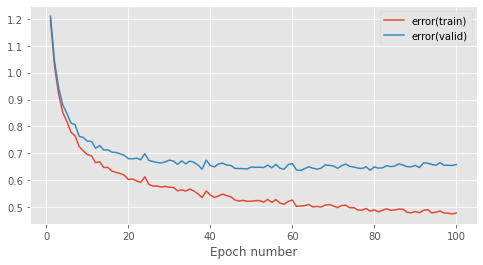

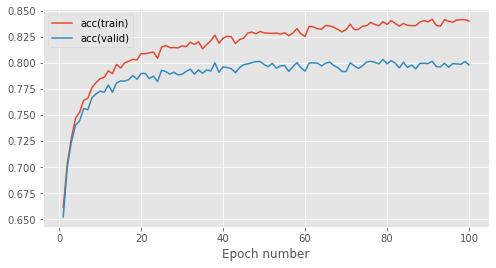

In [6]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 32


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats1, keys1, run_time, fig_1, ax_1, fig_2, ax_2  = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

Epoch 1: 3.8s to complete
    error(train)=8.92e-01, acc(train)=7.39e-01, error(valid)=8.99e-01, acc(valid)=7.37e-01


Epoch 2: 3.8s to complete
    error(train)=7.44e-01, acc(train)=7.73e-01, error(valid)=7.69e-01, acc(valid)=7.66e-01


Epoch 3: 3.6s to complete
    error(train)=6.75e-01, acc(train)=7.88e-01, error(valid)=7.06e-01, acc(valid)=7.83e-01


Epoch 4: 3.5s to complete
    error(train)=5.90e-01, acc(train)=8.14e-01, error(valid)=6.34e-01, acc(valid)=8.04e-01


Epoch 5: 3.5s to complete
    error(train)=5.62e-01, acc(train)=8.18e-01, error(valid)=6.15e-01, acc(valid)=8.07e-01


Epoch 6: 3.4s to complete
    error(train)=5.45e-01, acc(train)=8.22e-01, error(valid)=6.11e-01, acc(valid)=8.05e-01


Epoch 7: 3.5s to complete
    error(train)=5.14e-01, acc(train)=8.33e-01, error(valid)=5.84e-01, acc(valid)=8.13e-01


Epoch 8: 3.4s to complete
    error(train)=5.09e-01, acc(train)=8.32e-01, error(valid)=5.83e-01, acc(valid)=8.14e-01


Epoch 9: 3.3s to complete
    error(train)=4.85e-01, acc(train)=8.39e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


Epoch 10: 3.4s to complete
    error(train)=4.73e-01, acc(train)=8.42e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


Epoch 11: 3.5s to complete
    error(train)=4.69e-01, acc(train)=8.43e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


Epoch 12: 3.5s to complete
    error(train)=4.44e-01, acc(train)=8.50e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


Epoch 13: 3.2s to complete
    error(train)=4.32e-01, acc(train)=8.54e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


Epoch 14: 3.4s to complete
    error(train)=4.26e-01, acc(train)=8.56e-01, error(valid)=5.40e-01, acc(valid)=8.28e-01


Epoch 15: 3.6s to complete
    error(train)=4.23e-01, acc(train)=8.57e-01, error(valid)=5.44e-01, acc(valid)=8.25e-01


Epoch 16: 4.0s to complete
    error(train)=4.10e-01, acc(train)=8.60e-01, error(valid)=5.42e-01, acc(valid)=8.26e-01


Epoch 17: 3.8s to complete
    error(train)=4.06e-01, acc(train)=8.60e-01, error(valid)=5.37e-01, acc(valid)=8.28e-01


Epoch 18: 3.5s to complete
    error(train)=3.96e-01, acc(train)=8.64e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


Epoch 19: 3.5s to complete
    error(train)=3.98e-01, acc(train)=8.63e-01, error(valid)=5.43e-01, acc(valid)=8.26e-01


Epoch 20: 3.4s to complete
    error(train)=3.88e-01, acc(train)=8.67e-01, error(valid)=5.42e-01, acc(valid)=8.27e-01


Epoch 21: 3.2s to complete
    error(train)=3.90e-01, acc(train)=8.65e-01, error(valid)=5.53e-01, acc(valid)=8.27e-01


Epoch 22: 3.4s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=5.44e-01, acc(valid)=8.29e-01


Epoch 23: 3.6s to complete
    error(train)=3.83e-01, acc(train)=8.67e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01


Epoch 24: 3.7s to complete
    error(train)=3.72e-01, acc(train)=8.68e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


Epoch 25: 4.0s to complete
    error(train)=3.70e-01, acc(train)=8.71e-01, error(valid)=5.47e-01, acc(valid)=8.32e-01


Epoch 26: 4.3s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=5.57e-01, acc(valid)=8.28e-01


Epoch 27: 3.9s to complete
    error(train)=3.69e-01, acc(train)=8.70e-01, error(valid)=5.58e-01, acc(valid)=8.25e-01


Epoch 28: 3.7s to complete
    error(train)=3.54e-01, acc(train)=8.75e-01, error(valid)=5.50e-01, acc(valid)=8.29e-01


Epoch 29: 3.4s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=5.51e-01, acc(valid)=8.27e-01


Epoch 30: 3.8s to complete
    error(train)=3.51e-01, acc(train)=8.77e-01, error(valid)=5.48e-01, acc(valid)=8.30e-01


Epoch 31: 3.9s to complete
    error(train)=3.48e-01, acc(train)=8.78e-01, error(valid)=5.54e-01, acc(valid)=8.29e-01


Epoch 32: 3.8s to complete
    error(train)=3.48e-01, acc(train)=8.77e-01, error(valid)=5.63e-01, acc(valid)=8.25e-01


Epoch 33: 3.8s to complete
    error(train)=3.42e-01, acc(train)=8.78e-01, error(valid)=5.63e-01, acc(valid)=8.25e-01


Epoch 34: 3.8s to complete
    error(train)=3.31e-01, acc(train)=8.83e-01, error(valid)=5.52e-01, acc(valid)=8.31e-01


Epoch 35: 4.3s to complete
    error(train)=3.42e-01, acc(train)=8.77e-01, error(valid)=5.73e-01, acc(valid)=8.24e-01


Epoch 36: 4.1s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=5.62e-01, acc(valid)=8.28e-01


Epoch 37: 4.3s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=5.80e-01, acc(valid)=8.26e-01


Epoch 38: 4.1s to complete
    error(train)=3.26e-01, acc(train)=8.84e-01, error(valid)=5.72e-01, acc(valid)=8.27e-01


Epoch 39: 5.4s to complete
    error(train)=3.30e-01, acc(train)=8.82e-01, error(valid)=5.86e-01, acc(valid)=8.27e-01


Epoch 40: 5.1s to complete
    error(train)=3.33e-01, acc(train)=8.80e-01, error(valid)=5.89e-01, acc(valid)=8.21e-01


Epoch 41: 5.0s to complete
    error(train)=3.27e-01, acc(train)=8.81e-01, error(valid)=5.85e-01, acc(valid)=8.23e-01


Epoch 42: 5.0s to complete
    error(train)=3.28e-01, acc(train)=8.80e-01, error(valid)=5.92e-01, acc(valid)=8.21e-01


Epoch 43: 5.5s to complete
    error(train)=3.24e-01, acc(train)=8.80e-01, error(valid)=5.93e-01, acc(valid)=8.19e-01


Epoch 44: 5.3s to complete
    error(train)=3.14e-01, acc(train)=8.87e-01, error(valid)=5.87e-01, acc(valid)=8.29e-01


Epoch 45: 5.3s to complete
    error(train)=3.30e-01, acc(train)=8.82e-01, error(valid)=6.08e-01, acc(valid)=8.22e-01


Epoch 46: 4.1s to complete
    error(train)=3.17e-01, acc(train)=8.85e-01, error(valid)=5.94e-01, acc(valid)=8.20e-01


Epoch 47: 4.2s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=6.05e-01, acc(valid)=8.22e-01


Epoch 48: 4.9s to complete
    error(train)=3.04e-01, acc(train)=8.89e-01, error(valid)=6.00e-01, acc(valid)=8.25e-01


Epoch 49: 4.7s to complete
    error(train)=3.03e-01, acc(train)=8.91e-01, error(valid)=6.03e-01, acc(valid)=8.26e-01


Epoch 50: 4.1s to complete
    error(train)=3.09e-01, acc(train)=8.88e-01, error(valid)=6.06e-01, acc(valid)=8.21e-01


Epoch 51: 4.0s to complete
    error(train)=3.06e-01, acc(train)=8.89e-01, error(valid)=6.15e-01, acc(valid)=8.23e-01


Epoch 52: 4.1s to complete
    error(train)=3.13e-01, acc(train)=8.86e-01, error(valid)=6.23e-01, acc(valid)=8.24e-01


Epoch 53: 4.4s to complete
    error(train)=2.97e-01, acc(train)=8.92e-01, error(valid)=6.09e-01, acc(valid)=8.24e-01


Epoch 54: 4.1s to complete
    error(train)=2.98e-01, acc(train)=8.91e-01, error(valid)=6.22e-01, acc(valid)=8.22e-01


Epoch 55: 4.1s to complete
    error(train)=2.95e-01, acc(train)=8.92e-01, error(valid)=6.14e-01, acc(valid)=8.24e-01


Epoch 56: 4.1s to complete
    error(train)=2.97e-01, acc(train)=8.91e-01, error(valid)=6.28e-01, acc(valid)=8.19e-01


Epoch 57: 5.1s to complete
    error(train)=2.95e-01, acc(train)=8.91e-01, error(valid)=6.35e-01, acc(valid)=8.17e-01


Epoch 58: 5.9s to complete
    error(train)=2.92e-01, acc(train)=8.93e-01, error(valid)=6.26e-01, acc(valid)=8.23e-01


Epoch 59: 5.5s to complete
    error(train)=2.90e-01, acc(train)=8.93e-01, error(valid)=6.32e-01, acc(valid)=8.23e-01


Epoch 60: 4.9s to complete
    error(train)=2.80e-01, acc(train)=8.98e-01, error(valid)=6.26e-01, acc(valid)=8.23e-01


Epoch 61: 4.8s to complete
    error(train)=2.97e-01, acc(train)=8.89e-01, error(valid)=6.51e-01, acc(valid)=8.14e-01


Epoch 62: 4.8s to complete
    error(train)=2.86e-01, acc(train)=8.95e-01, error(valid)=6.46e-01, acc(valid)=8.23e-01


Epoch 63: 4.8s to complete
    error(train)=2.92e-01, acc(train)=8.93e-01, error(valid)=6.53e-01, acc(valid)=8.18e-01


Epoch 64: 4.3s to complete
    error(train)=2.81e-01, acc(train)=8.97e-01, error(valid)=6.49e-01, acc(valid)=8.19e-01


Epoch 65: 4.3s to complete
    error(train)=2.86e-01, acc(train)=8.95e-01, error(valid)=6.50e-01, acc(valid)=8.20e-01


Epoch 66: 4.3s to complete
    error(train)=2.94e-01, acc(train)=8.91e-01, error(valid)=6.65e-01, acc(valid)=8.17e-01


Epoch 67: 5.1s to complete
    error(train)=2.93e-01, acc(train)=8.91e-01, error(valid)=6.68e-01, acc(valid)=8.12e-01


Epoch 68: 5.0s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=6.59e-01, acc(valid)=8.16e-01


Epoch 69: 4.3s to complete
    error(train)=2.85e-01, acc(train)=8.93e-01, error(valid)=6.68e-01, acc(valid)=8.16e-01


Epoch 70: 4.1s to complete
    error(train)=2.83e-01, acc(train)=8.94e-01, error(valid)=6.80e-01, acc(valid)=8.16e-01


Epoch 71: 4.7s to complete
    error(train)=2.73e-01, acc(train)=8.99e-01, error(valid)=6.69e-01, acc(valid)=8.19e-01


Epoch 72: 5.1s to complete
    error(train)=2.79e-01, acc(train)=8.97e-01, error(valid)=6.80e-01, acc(valid)=8.18e-01


Epoch 73: 5.0s to complete
    error(train)=2.92e-01, acc(train)=8.92e-01, error(valid)=7.03e-01, acc(valid)=8.13e-01


Epoch 74: 4.5s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=6.83e-01, acc(valid)=8.16e-01


Epoch 75: 4.6s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=6.87e-01, acc(valid)=8.12e-01


Epoch 76: 4.7s to complete
    error(train)=2.67e-01, acc(train)=9.01e-01, error(valid)=6.85e-01, acc(valid)=8.18e-01


Epoch 77: 4.4s to complete
    error(train)=2.74e-01, acc(train)=8.99e-01, error(valid)=6.82e-01, acc(valid)=8.17e-01


Epoch 78: 4.3s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=6.87e-01, acc(valid)=8.16e-01


Epoch 79: 4.5s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=7.00e-01, acc(valid)=8.15e-01


Epoch 80: 4.8s to complete
    error(train)=2.66e-01, acc(train)=9.02e-01, error(valid)=6.98e-01, acc(valid)=8.15e-01


Epoch 81: 4.9s to complete
    error(train)=2.60e-01, acc(train)=9.04e-01, error(valid)=7.03e-01, acc(valid)=8.15e-01


Epoch 82: 4.7s to complete
    error(train)=2.60e-01, acc(train)=9.02e-01, error(valid)=6.90e-01, acc(valid)=8.19e-01


Epoch 83: 4.6s to complete
    error(train)=2.69e-01, acc(train)=8.99e-01, error(valid)=7.09e-01, acc(valid)=8.14e-01


Epoch 84: 4.3s to complete
    error(train)=2.68e-01, acc(train)=8.99e-01, error(valid)=7.12e-01, acc(valid)=8.15e-01


Epoch 85: 4.6s to complete
    error(train)=2.61e-01, acc(train)=9.02e-01, error(valid)=7.13e-01, acc(valid)=8.13e-01


Epoch 86: 5.0s to complete
    error(train)=2.63e-01, acc(train)=9.02e-01, error(valid)=7.24e-01, acc(valid)=8.14e-01


Epoch 87: 5.0s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=7.21e-01, acc(valid)=8.15e-01


Epoch 88: 4.7s to complete
    error(train)=2.71e-01, acc(train)=8.97e-01, error(valid)=7.34e-01, acc(valid)=8.12e-01


Epoch 89: 4.8s to complete
    error(train)=2.64e-01, acc(train)=9.01e-01, error(valid)=7.24e-01, acc(valid)=8.11e-01


Epoch 90: 4.4s to complete
    error(train)=2.67e-01, acc(train)=8.99e-01, error(valid)=7.40e-01, acc(valid)=8.12e-01


Epoch 91: 4.3s to complete
    error(train)=2.60e-01, acc(train)=9.03e-01, error(valid)=7.24e-01, acc(valid)=8.15e-01


Epoch 92: 4.5s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=7.38e-01, acc(valid)=8.13e-01


Epoch 93: 5.5s to complete
    error(train)=2.64e-01, acc(train)=9.01e-01, error(valid)=7.46e-01, acc(valid)=8.14e-01


Epoch 94: 4.8s to complete
    error(train)=2.55e-01, acc(train)=9.03e-01, error(valid)=7.48e-01, acc(valid)=8.13e-01


Epoch 95: 4.4s to complete
    error(train)=2.55e-01, acc(train)=9.04e-01, error(valid)=7.44e-01, acc(valid)=8.12e-01


Epoch 96: 4.8s to complete
    error(train)=2.60e-01, acc(train)=9.02e-01, error(valid)=7.48e-01, acc(valid)=8.16e-01


Epoch 97: 4.6s to complete
    error(train)=2.61e-01, acc(train)=8.99e-01, error(valid)=7.58e-01, acc(valid)=8.09e-01


Epoch 98: 4.5s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=7.48e-01, acc(valid)=8.10e-01


Epoch 99: 4.4s to complete
    error(train)=2.49e-01, acc(train)=9.05e-01, error(valid)=7.45e-01, acc(valid)=8.17e-01


Epoch 100: 4.3s to complete
    error(train)=2.53e-01, acc(train)=9.05e-01, error(valid)=7.64e-01, acc(valid)=8.13e-01


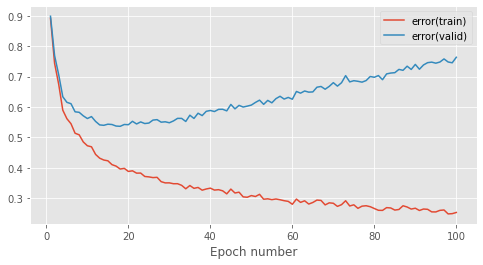

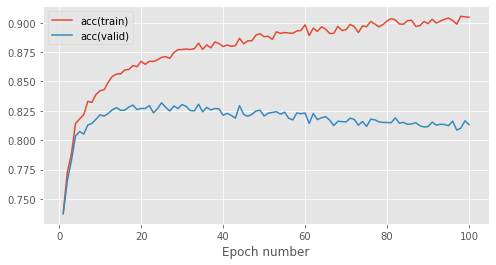

In [7]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 64


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats2, keys2, run_time, fig_1, ax_1, fig_2, ax_2  = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

Epoch 1: 9.5s to complete
    error(train)=7.45e-01, acc(train)=7.73e-01, error(valid)=7.69e-01, acc(valid)=7.66e-01


Epoch 2: 9.5s to complete
    error(train)=5.80e-01, acc(train)=8.14e-01, error(valid)=6.24e-01, acc(valid)=8.02e-01


Epoch 3: 9.0s to complete
    error(train)=5.07e-01, acc(train)=8.33e-01, error(valid)=5.65e-01, acc(valid)=8.17e-01


Epoch 4: 7.3s to complete
    error(train)=4.64e-01, acc(train)=8.43e-01, error(valid)=5.44e-01, acc(valid)=8.22e-01


Epoch 5: 7.5s to complete
    error(train)=4.31e-01, acc(train)=8.54e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


Epoch 6: 7.1s to complete
    error(train)=3.99e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.30e-01


Epoch 7: 7.1s to complete
    error(train)=3.88e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.31e-01


Epoch 8: 8.3s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


Epoch 9: 7.3s to complete
    error(train)=3.49e-01, acc(train)=8.78e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


Epoch 10: 6.8s to complete
    error(train)=3.38e-01, acc(train)=8.79e-01, error(valid)=5.13e-01, acc(valid)=8.33e-01


Epoch 11: 7.5s to complete
    error(train)=3.29e-01, acc(train)=8.81e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


Epoch 12: 7.5s to complete
    error(train)=3.12e-01, acc(train)=8.86e-01, error(valid)=5.12e-01, acc(valid)=8.39e-01


Epoch 13: 7.3s to complete
    error(train)=2.94e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.38e-01


Epoch 14: 7.1s to complete
    error(train)=2.89e-01, acc(train)=8.93e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


Epoch 15: 7.4s to complete
    error(train)=2.80e-01, acc(train)=8.93e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 16: 7.4s to complete
    error(train)=2.70e-01, acc(train)=8.99e-01, error(valid)=5.39e-01, acc(valid)=8.35e-01


Epoch 17: 7.4s to complete
    error(train)=2.56e-01, acc(train)=9.04e-01, error(valid)=5.36e-01, acc(valid)=8.39e-01


Epoch 18: 7.4s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=5.40e-01, acc(valid)=8.37e-01


Epoch 19: 6.7s to complete
    error(train)=2.53e-01, acc(train)=9.02e-01, error(valid)=5.60e-01, acc(valid)=8.34e-01


Epoch 20: 7.2s to complete
    error(train)=2.41e-01, acc(train)=9.08e-01, error(valid)=5.54e-01, acc(valid)=8.33e-01


Epoch 21: 7.4s to complete
    error(train)=2.40e-01, acc(train)=9.07e-01, error(valid)=5.75e-01, acc(valid)=8.35e-01


Epoch 22: 7.2s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.73e-01, acc(valid)=8.35e-01


Epoch 23: 6.9s to complete
    error(train)=2.34e-01, acc(train)=9.07e-01, error(valid)=6.05e-01, acc(valid)=8.28e-01


Epoch 24: 7.2s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=5.90e-01, acc(valid)=8.34e-01


Epoch 25: 7.3s to complete
    error(train)=2.21e-01, acc(train)=9.13e-01, error(valid)=6.03e-01, acc(valid)=8.29e-01


Epoch 26: 7.3s to complete
    error(train)=2.10e-01, acc(train)=9.18e-01, error(valid)=6.18e-01, acc(valid)=8.30e-01


Epoch 27: 7.3s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.17e-01, acc(valid)=8.33e-01


Epoch 28: 7.5s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=6.53e-01, acc(valid)=8.27e-01


Epoch 29: 7.4s to complete
    error(train)=2.04e-01, acc(train)=9.19e-01, error(valid)=6.49e-01, acc(valid)=8.30e-01


Epoch 30: 7.2s to complete
    error(train)=1.90e-01, acc(train)=9.25e-01, error(valid)=6.48e-01, acc(valid)=8.33e-01


Epoch 31: 7.4s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=6.83e-01, acc(valid)=8.24e-01


Epoch 32: 7.1s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=6.86e-01, acc(valid)=8.31e-01


Epoch 33: 7.0s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=7.07e-01, acc(valid)=8.27e-01


Epoch 34: 7.5s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=6.99e-01, acc(valid)=8.26e-01


Epoch 35: 7.3s to complete
    error(train)=1.80e-01, acc(train)=9.27e-01, error(valid)=7.20e-01, acc(valid)=8.29e-01


Epoch 36: 7.5s to complete
    error(train)=1.88e-01, acc(train)=9.24e-01, error(valid)=7.47e-01, acc(valid)=8.21e-01


Epoch 37: 7.5s to complete
    error(train)=1.71e-01, acc(train)=9.31e-01, error(valid)=7.45e-01, acc(valid)=8.29e-01


Epoch 38: 7.0s to complete
    error(train)=1.71e-01, acc(train)=9.30e-01, error(valid)=7.59e-01, acc(valid)=8.26e-01


Epoch 39: 7.4s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=7.58e-01, acc(valid)=8.28e-01


Epoch 40: 8.2s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=7.67e-01, acc(valid)=8.29e-01


Epoch 41: 7.6s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=7.83e-01, acc(valid)=8.26e-01


Epoch 42: 7.3s to complete
    error(train)=1.62e-01, acc(train)=9.34e-01, error(valid)=7.94e-01, acc(valid)=8.28e-01


Epoch 43: 7.1s to complete
    error(train)=1.48e-01, acc(train)=9.41e-01, error(valid)=7.97e-01, acc(valid)=8.28e-01


Epoch 44: 7.2s to complete
    error(train)=1.53e-01, acc(train)=9.38e-01, error(valid)=8.30e-01, acc(valid)=8.24e-01


Epoch 45: 7.5s to complete
    error(train)=1.59e-01, acc(train)=9.33e-01, error(valid)=8.47e-01, acc(valid)=8.21e-01


Epoch 46: 7.3s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=8.23e-01, acc(valid)=8.28e-01


Epoch 47: 7.3s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=8.88e-01, acc(valid)=8.23e-01


Epoch 48: 7.4s to complete
    error(train)=1.48e-01, acc(train)=9.40e-01, error(valid)=8.76e-01, acc(valid)=8.21e-01


Epoch 49: 9.9s to complete
    error(train)=1.53e-01, acc(train)=9.36e-01, error(valid)=9.02e-01, acc(valid)=8.22e-01


Epoch 50: 10.1s to complete
    error(train)=1.49e-01, acc(train)=9.38e-01, error(valid)=9.30e-01, acc(valid)=8.18e-01


Epoch 51: 9.1s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=9.32e-01, acc(valid)=8.20e-01


Epoch 52: 8.9s to complete
    error(train)=1.40e-01, acc(train)=9.41e-01, error(valid)=9.31e-01, acc(valid)=8.21e-01


Epoch 53: 8.8s to complete
    error(train)=1.47e-01, acc(train)=9.39e-01, error(valid)=9.52e-01, acc(valid)=8.24e-01


Epoch 54: 8.8s to complete
    error(train)=1.48e-01, acc(train)=9.38e-01, error(valid)=9.46e-01, acc(valid)=8.20e-01


Epoch 55: 8.2s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=9.70e-01, acc(valid)=8.19e-01


Epoch 56: 7.8s to complete
    error(train)=1.57e-01, acc(train)=9.37e-01, error(valid)=1.00e+00, acc(valid)=8.19e-01


Epoch 57: 7.8s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=9.98e-01, acc(valid)=8.23e-01


Epoch 58: 7.9s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=9.88e-01, acc(valid)=8.24e-01


Epoch 59: 7.8s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.02e+00, acc(valid)=8.20e-01


Epoch 60: 7.8s to complete
    error(train)=1.29e-01, acc(train)=9.48e-01, error(valid)=1.04e+00, acc(valid)=8.21e-01


Epoch 61: 7.6s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


Epoch 62: 8.2s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.05e+00, acc(valid)=8.20e-01


Epoch 63: 7.7s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=1.08e+00, acc(valid)=8.18e-01


Epoch 64: 7.6s to complete
    error(train)=1.32e-01, acc(train)=9.45e-01, error(valid)=1.11e+00, acc(valid)=8.18e-01


Epoch 65: 8.7s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.10e+00, acc(valid)=8.20e-01


Epoch 66: 8.2s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=1.13e+00, acc(valid)=8.14e-01


Epoch 67: 7.8s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=1.13e+00, acc(valid)=8.19e-01


Epoch 68: 8.5s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.13e+00, acc(valid)=8.17e-01


Epoch 69: 8.4s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.18e+00, acc(valid)=8.19e-01


Epoch 70: 7.9s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.15e+00, acc(valid)=8.19e-01


Epoch 71: 7.6s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.16e+00, acc(valid)=8.20e-01


Epoch 72: 7.7s to complete
    error(train)=1.30e-01, acc(train)=9.45e-01, error(valid)=1.19e+00, acc(valid)=8.15e-01


Epoch 73: 7.6s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=1.21e+00, acc(valid)=8.18e-01


Epoch 74: 7.4s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=1.23e+00, acc(valid)=8.12e-01


Epoch 75: 8.8s to complete
    error(train)=1.15e-01, acc(train)=9.52e-01, error(valid)=1.25e+00, acc(valid)=8.19e-01


Epoch 76: 7.7s to complete
    error(train)=1.08e-01, acc(train)=9.57e-01, error(valid)=1.23e+00, acc(valid)=8.17e-01


Epoch 77: 7.3s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.24e+00, acc(valid)=8.19e-01


Epoch 78: 7.5s to complete
    error(train)=1.09e-01, acc(train)=9.55e-01, error(valid)=1.25e+00, acc(valid)=8.17e-01


Epoch 79: 7.8s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=1.31e+00, acc(valid)=8.13e-01


Epoch 80: 7.6s to complete
    error(train)=1.05e-01, acc(train)=9.56e-01, error(valid)=1.28e+00, acc(valid)=8.17e-01


Epoch 81: 7.6s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=1.30e+00, acc(valid)=8.15e-01


Epoch 82: 8.3s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.32e+00, acc(valid)=8.17e-01


Epoch 83: 8.9s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.31e+00, acc(valid)=8.20e-01


Epoch 84: 7.8s to complete
    error(train)=1.08e-01, acc(train)=9.55e-01, error(valid)=1.31e+00, acc(valid)=8.19e-01


Epoch 85: 7.6s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.34e+00, acc(valid)=8.16e-01


Epoch 86: 7.6s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.34e+00, acc(valid)=8.15e-01


Epoch 87: 10.3s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.36e+00, acc(valid)=8.20e-01


Epoch 88: 9.2s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.40e+00, acc(valid)=8.16e-01


Epoch 89: 10.8s to complete
    error(train)=9.43e-02, acc(train)=9.61e-01, error(valid)=1.38e+00, acc(valid)=8.19e-01


Epoch 90: 8.5s to complete
    error(train)=1.07e-01, acc(train)=9.56e-01, error(valid)=1.41e+00, acc(valid)=8.14e-01


Epoch 91: 7.8s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.44e+00, acc(valid)=8.16e-01


Epoch 92: 8.0s to complete
    error(train)=1.10e-01, acc(train)=9.55e-01, error(valid)=1.44e+00, acc(valid)=8.15e-01


Epoch 93: 8.3s to complete
    error(train)=1.09e-01, acc(train)=9.55e-01, error(valid)=1.48e+00, acc(valid)=8.15e-01


Epoch 94: 8.3s to complete
    error(train)=1.08e-01, acc(train)=9.56e-01, error(valid)=1.49e+00, acc(valid)=8.15e-01


Epoch 95: 7.8s to complete
    error(train)=1.20e-01, acc(train)=9.53e-01, error(valid)=1.49e+00, acc(valid)=8.13e-01


Epoch 96: 7.6s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=1.50e+00, acc(valid)=8.22e-01


Epoch 97: 7.9s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.48e+00, acc(valid)=8.15e-01


Epoch 98: 8.0s to complete
    error(train)=9.25e-02, acc(train)=9.61e-01, error(valid)=1.50e+00, acc(valid)=8.17e-01


Epoch 99: 8.6s to complete
    error(train)=9.08e-02, acc(train)=9.63e-01, error(valid)=1.53e+00, acc(valid)=8.17e-01


Epoch 100: 8.0s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=1.55e+00, acc(valid)=8.12e-01


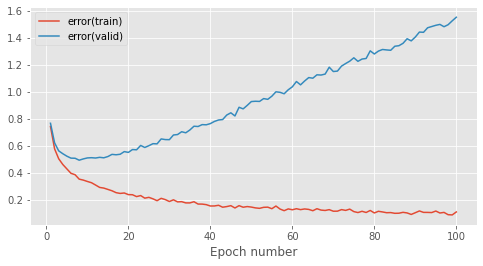

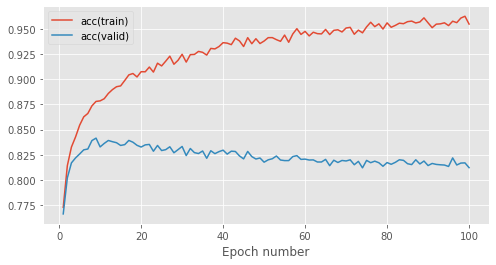

In [8]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer,DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty
from mlp.penalties import L2Penalty

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats3, keys3, run_time, fig_1, ax_1, fig_2, ax_2  = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

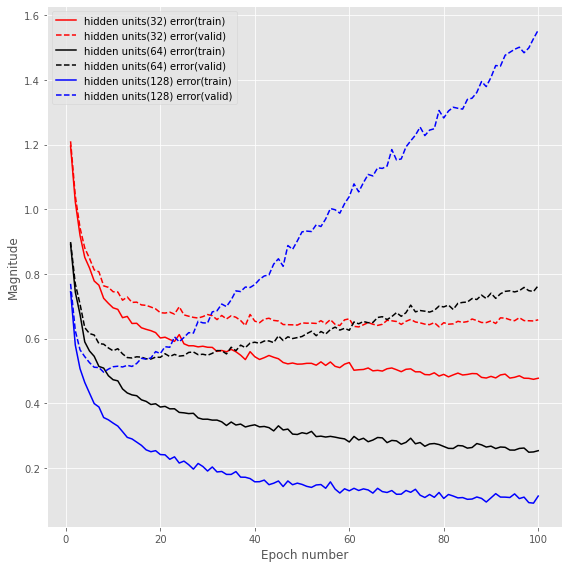

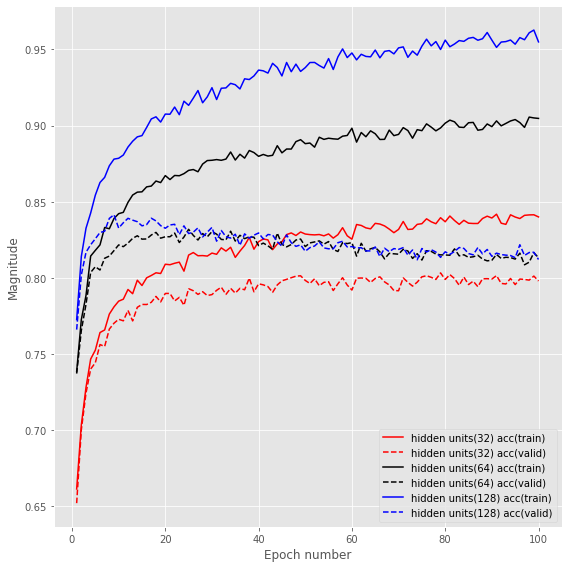

In [25]:
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(111)
k1='error(train)'
k2='error(valid)'
ax1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
          stats1[1:, keys1[k1]], label="hidden units(32) "+k1,color = 'red')
ax1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
          stats1[1:, keys1[k2]], label="hidden units(32) "+k2,color = 'red',linestyle="dashed")

ax1.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
          stats2[1:, keys2[k1]], label="hidden units(64) "+k1,color='black')
ax1.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
          stats2[1:, keys2[k2]], label="hidden units(64) "+k2,color='black',linestyle="dashed")

ax1.plot(np.arange(1, stats3.shape[0]) * stats_interval, 
          stats3[1:, keys3[k1]], label="hidden units(128) "+k1,color='blue')
ax1.plot(np.arange(1, stats3.shape[0]) * stats_interval, 
          stats3[1:, keys3[k2]], label="hidden units(128) "+k2,color='blue',linestyle="dashed")
ax1.legend(loc=0)
ax1.set_xlabel('Epoch number')
ax1.set_ylabel('Magnitude')
fig1.tight_layout()
fig1.savefig('changeimg/error curve of varying number of hidden units.pdf')


k1='acc(train)'
k2='acc(valid)'

fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(111)
ax2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
          stats1[1:, keys1[k1]], label="hidden units(32) "+k1,color = 'red')
ax2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
          stats1[1:, keys1[k2]], label="hidden units(32) "+k2,color = 'red',linestyle="dashed")

ax2.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
          stats2[1:, keys2[k1]], label="hidden units(64) "+k1,color='black')
ax2.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
          stats2[1:, keys2[k2]], label="hidden units(64) "+k2,color='black',linestyle="dashed")

ax2.plot(np.arange(1, stats3.shape[0]) * stats_interval, 
          stats3[1:, keys3[k1]], label="hidden units(128) "+k1,color='blue')
ax2.plot(np.arange(1, stats3.shape[0]) * stats_interval, 
          stats3[1:, keys3[k2]], label="hidden units(128) "+k2,color='blue',linestyle="dashed")
ax2.legend(loc=0)
ax2.set_xlabel('Epoch number')
ax2.set_ylabel('Magnitude')
fig2.tight_layout()
fig2.savefig('changeimg/acc curve of varying number of hidden units.pdf')

In [1]:
fig1 = plt.figure(figsize=(8, 4))
ax_1 = fig1.add_subplot(111)
for k in ['error(valid)']:
    ax_1.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
              stats1[1:, keys1[k]], label="hidden units(32) "+k)
    ax_1.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
              stats2[1:, keys2[k]], label="hidden units(64) "+k)
    ax_1.plot(np.arange(1, stats3.shape[0]) * stats_interval, 
              stats3[1:, keys3[k]], label="hidden units(128) "+k)
ax_1.legend(loc=0)
ax_1.set_xlabel('Epoch number')

fig2 = plt.figure(figsize=(8, 4))
ax_2 = fig2.add_subplot(111)
for k in ['acc(valid)']:
    ax_2.plot(np.arange(1, stats1.shape[0]) * stats_interval, 
              stats1[1:, keys1[k]], label="hidden units(32) "+k)
    ax_2.plot(np.arange(1, stats2.shape[0]) * stats_interval, 
              stats2[1:, keys2[k]], label="hidden units(64) "+k)
    ax_2.plot(np.arange(1, stats3.shape[0]) * stats_interval, 
              stats3[1:, keys3[k]], label="hidden units(128) "+k)
ax_2.legend(loc=0)
ax_2.set_xlabel('Epoch number')

NameError: name 'plt' is not defined